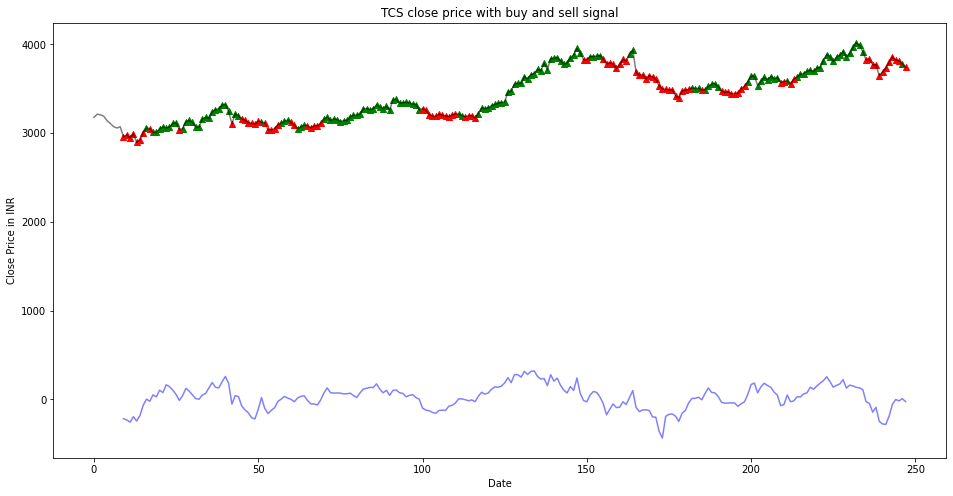

In [ ]:
from pandas.core import indexing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('/content/TCS.NS.csv')

p=[]


def pmo(data,p):
  
  val=0
  for i in range(9,len(data)):
    
    val=data['Close'][i]-data['Close'][i-9]
    p.append(val)
  



pmo(df,p)


index_arr=[]
for i in range(9,len(df)):
  index_arr.append(i)


column_val=['Close']
# print(p)
  
data_arr=np.array(p) 

df1=pd.DataFrame(
    data=data_arr,
    index=index_arr,
    columns=column_val)


df['PMO']=df1


def statergy(df):
    
  pred_buy=[]
  pred_sell=[]
  buyprice=0
  for i in range(0,len(df)):
    if i>=9:
      t=i-9
      s=df['Close'][i]-df['Close'][t]
      if(s>=0):
        # print("predict increase")
        pred_buy.append(df['Close'][i])
        pred_sell.append(np.nan)
        buyprice=df['Close'][i]

      elif(s<0):
        # print("decrease") 
        pred_buy.append(np.nan)
        pred_sell.append(df['Close'][i])
        buyprice=0

    else:
      pred_buy.append(np.nan)
      pred_sell.append(np.nan)
      


   
        

  return (pred_buy,pred_sell)





    
  

# plt.plot()
# plt.plot(df1)


df['Buy_stock']= statergy(df)[0]
df['Sell_stock']=statergy(df)[1]


# print(df1)

# print(df['PMO'])


plt.figure(figsize=(16,8))
plt.title('TCS close price with buy and sell signal')
plt.plot(df['Close'],alpha=0.5,label='CLOSE',color='black')
plt.plot(df['PMO'],alpha=0.5,label='PMO',color='blue')
plt.scatter(df.index,df['Buy_stock'],color='green',label='Buy signal',marker='^',alpha=1)
plt.scatter(df.index,df['Sell_stock'],color='red',label='Sell signal',marker='^',alpha=1)

plt.xlabel('Date')
plt.ylabel('Close Price in INR')

plt.show()
